In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Fetching Data from Drive

In [ ]:
import gdown

# File ID from the Google Drive link
file_id = '1-vVoiPSa-9PPLoAGXPjQ_sgwzRbMFDde'

# Download the file
url = f'https://drive.google.com/uc?id={file_id}'
output = 'dataset.csv'
gdown.download(url, output, quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1-vVoiPSa-9PPLoAGXPjQ_sgwzRbMFDde
From (redirected): https://drive.google.com/uc?id=1-vVoiPSa-9PPLoAGXPjQ_sgwzRbMFDde&confirm=t&uuid=83edbac7-6b74-412d-a586-0bbde0cb8beb
To: /content/dataset.csv
100%|██████████| 4.57G/4.57G [00:46<00:00, 98.1MB/s]


'dataset.csv'

Loading data in the Data Frame

In [ ]:
import pandas as pd

# Load a sample of the dataset
sample_size = 1000  # Adjust the sample size as needed
data = pd.read_csv('dataset.csv', nrows=sample_size)


Distribution of Features using matplot library

Histrograms

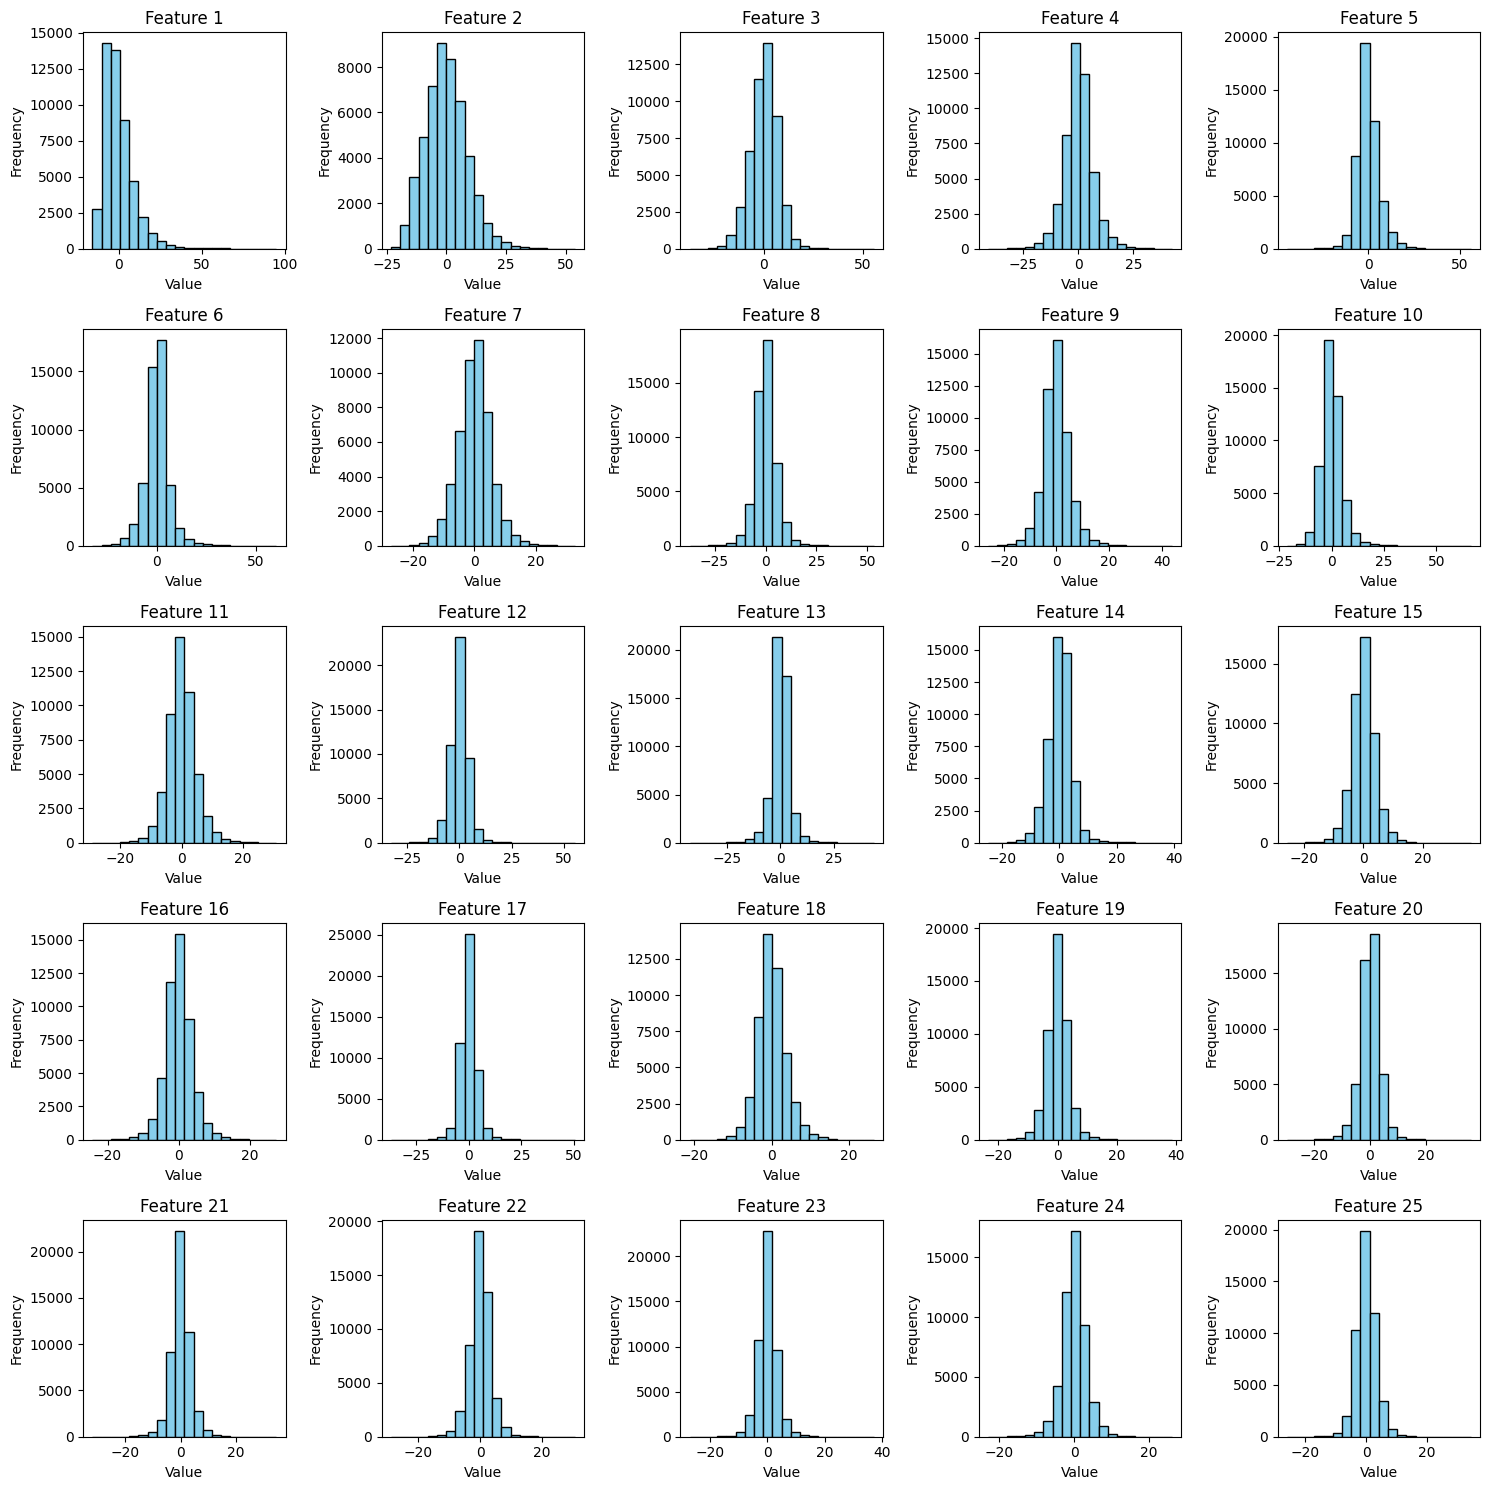

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your DataFrame containing the dataset with 50000 rows and 4600 columns
# Assuming you want to display histograms for the first 25 columns

# Select the first 25 features
selected_features = data.iloc[:, :25]

# Create a 5 by 5 grid for the histograms
fig, axes = plt.subplots(5, 5, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms for each feature
for i, (col, ax) in enumerate(zip(selected_features.columns, axes)):
    ax.hist(selected_features[col], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(f'Feature {i+1}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Adjust layout and display
plt.tight_layout()

# Save the figure as an image file
plt.savefig('histogram.png')

# Show the plot
plt.show()


Box Plot

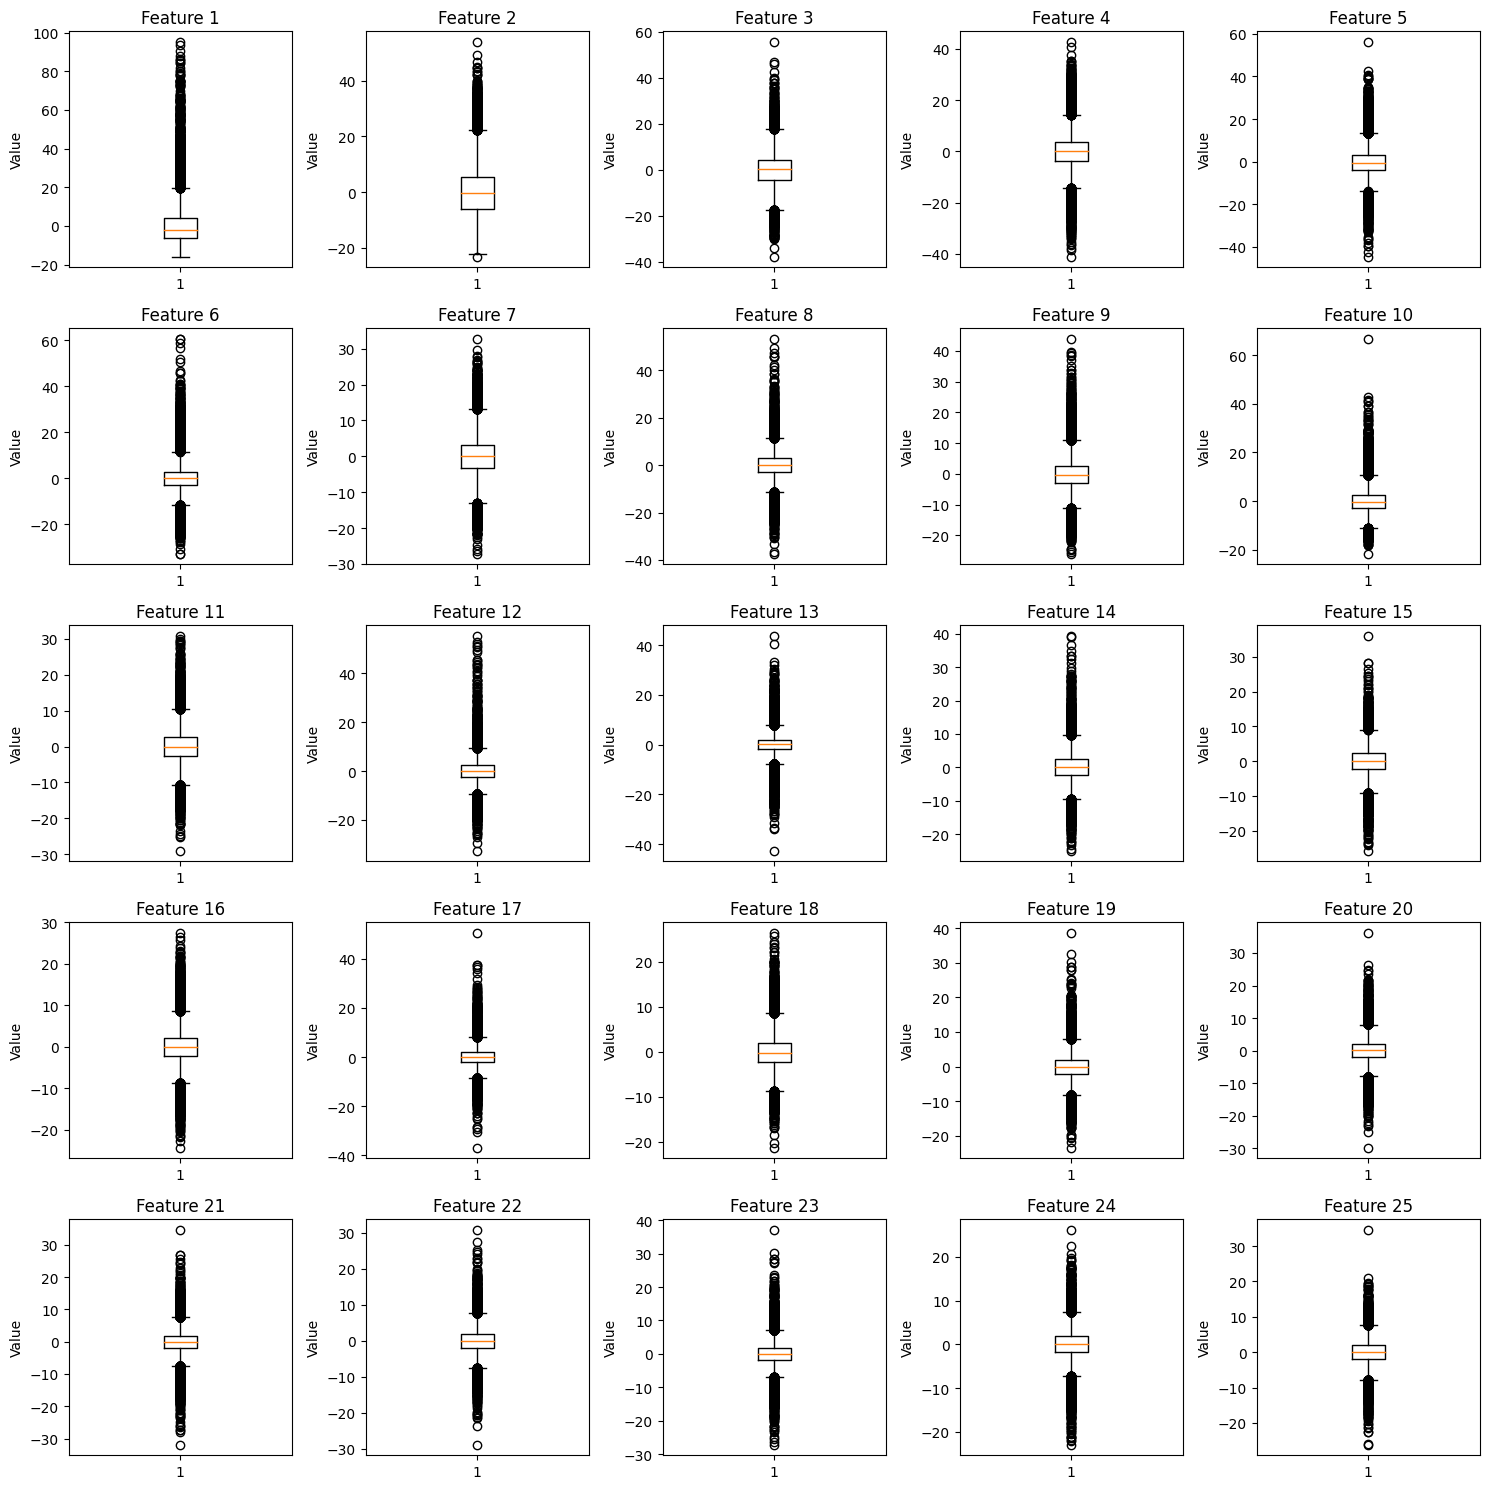

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your DataFrame containing the dataset with 50000 rows and 4600 columns
# Assuming you want to display box plots for the first 25 columns

# Select the first 25 features
selected_features = data.iloc[:, :25]

# Create a 5 by 5 grid for the box plots
fig, axes = plt.subplots(5, 5, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot box plots for each feature
for i, (col, ax) in enumerate(zip(selected_features.columns, axes)):
    ax.boxplot(selected_features[col])
    ax.set_title(f'Feature {i+1}')
    ax.set_ylabel('Value')

# Adjust layout and display
plt.tight_layout()

# Save the figure as an image file
plt.savefig('box_plots.png')

# Show the plot
plt.show()


In [ ]:
print(df.head())

   Feature_0  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0  -0.302709   0.044915   0.309531   0.066957   0.069242   0.128698   
1  -0.150099  -0.253361  -0.145519   0.359803  -0.247028   0.063478   
2  -0.433461   0.248293  -0.168033  -0.232447   0.126926   0.066677   
3   0.102219   0.039029   0.064893  -0.031202  -0.006220  -0.223574   
4   0.045833   0.042785  -0.112945   0.506616  -0.341816  -0.044501   

   Feature_6  Feature_7  Feature_8  Feature_9  ...  Feature_4599  \
0  -0.155763   0.127795   0.349006  -0.134220  ...     -0.192290   
1  -0.266756  -0.117138   0.308962  -0.007129  ...     -0.060431   
2  -0.135699   0.078125  -0.235867  -0.020475  ...     -0.185728   
3  -0.093189  -0.141190  -0.162152  -0.190677  ...      0.292258   
4   0.079854  -0.131959  -0.148224  -0.083467  ...     -0.112959   

   Feature_4600  Feature_4601  Feature_4602  Feature_4603  Feature_4604  \
0     -0.016507      0.014300     -0.178668     -0.350076      0.385063   
1     -0.09561

In [ ]:
import pandas as pd

# Basic statistics for numerical variables
numerical_stats = df.describe()

print("Basic Statistics for Numerical Variables:")
print(numerical_stats)

Basic Statistics for Numerical Variables:
          Feature_0     Feature_1     Feature_2     Feature_3     Feature_4  \
count  49019.000000  49019.000000  49019.000000  49019.000000  49019.000000   
mean      -0.000984     -0.000938      0.001068     -0.000693     -0.001003   
std        0.199261      0.200982      0.200304      0.199896      0.200497   
min       -0.844639     -0.771561     -0.795313     -0.865343     -0.929209   
25%       -0.135220     -0.135990     -0.134672     -0.136113     -0.135562   
50%       -0.000916     -0.001920      0.000667     -0.000092     -0.001918   
75%        0.133409      0.136150      0.135817      0.134794      0.133778   
max        0.820737      0.845425      0.853754      0.844343      0.785003   

          Feature_5     Feature_6     Feature_7     Feature_8     Feature_9  \
count  49019.000000  49019.000000  49019.000000  49019.000000  49019.000000   
mean       0.002537     -0.000779     -0.000600     -0.000711      0.011239   
std      

I just tried to create a sample of data (1000) entries and ran diiferent inbuilt modesl and compared there accuracies on that just to get an idea of diffent models and there accuracies

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Define a list of classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=10000, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Naive Bayes': GaussianNB()
}

# Iterate over the classifiers and evaluate their performance
for name, clf in classifiers.items():
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    print(f'{name}: Accuracy: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})')

# Train the best classifier on the full training set
best_classifier = RandomForestClassifier(random_state=42)
best_classifier.fit(X_train, y_train)

# Evaluate the best classifier on the test set
test_accuracy = best_classifier.score(X_test, y_test)
print(f'Best Classifier Test Accuracy: {test_accuracy:.4f}')


Logistic Regression: Accuracy: 0.5305 (+/- 0.0296)
K-Nearest Neighbors: Accuracy: 0.3835 (+/- 0.0274)
Decision Tree: Accuracy: 0.2388 (+/- 0.0215)
Random Forest: Accuracy: 0.4233 (+/- 0.0229)
Support Vector Machine: Accuracy: 0.5350 (+/- 0.0550)
Naive Bayes: Accuracy: 0.4265 (+/- 0.0395)
Best Classifier Test Accuracy: 0.4190


In [ ]:
import pandas as pd

# # Get the number of rows and columns
num_rows, num_columns = df.shape

# Print the results
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")


Number of rows: 49019
Number of columns: 4609


In [ ]:
import pandas as pd

# Check for missing values
missing_values = df.isnull().sum()

# Remove rows with missing values
df_cleaned = df.dropna()

# # Print the shape of the cleaned dataset
print("Shape of cleaned dataset after removing missing values:")
print(df_cleaned.shape)


Shape of cleaned dataset after removing missing values:
(49019, 4609)


In [ ]:
print("Shape of cleaned dataset after removing missing values:")
print(df_cleaned.shape)


Shape of cleaned dataset after removing missing values:
(49019, 4609)


In [ ]:
# Step 1: Import necessary libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming you have your dataset loaded into a DataFrame named 'data'
# Replace 'data' with the name of your DataFrame containing your dataset

# Step 2: Separate features (X) and target (if any)
X = df.drop(columns=['label'])  # Adjust 'target_column_name' to your target column name if applicable

# Step 3: Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: PCA Application
pca = PCA(n_components=60)  # Adjust the explained variance threshold as desired
X_pca = pca.fit_transform(X_scaled)

# Step 5: Interpret the Results
# Now X_pca contains the transformed features with reduced dimensions based on PCA
# You can further analyze these components or use them for downstream tasks such as modeling


In [ ]:
# Assuming 'df' is your original DataFrame with the label column
# Assuming 'label_column_name' is the name of your label column

# Add the label column to the PCA-transformed DataFrame
X_pca_df['label'] = df['label']

# Save the DataFrame to a CSV file
X_pca_df.to_csv('pca_transformed_data_with_labels.csv', index=False)


In [ ]:
# Print the first two principal components
print("First principal component:", X_pca[:, 0])
print("Second principal component:", X_pca[:, 1])


First principal component: [  6.62531466  11.47805184  -3.83481212 ...  -0.61400079  -9.32223668
 -11.00136583]
Second principal component: [ -3.01462597 -15.46542434   7.0878298  ...  -6.61510862  -1.42866339
   1.98226213]


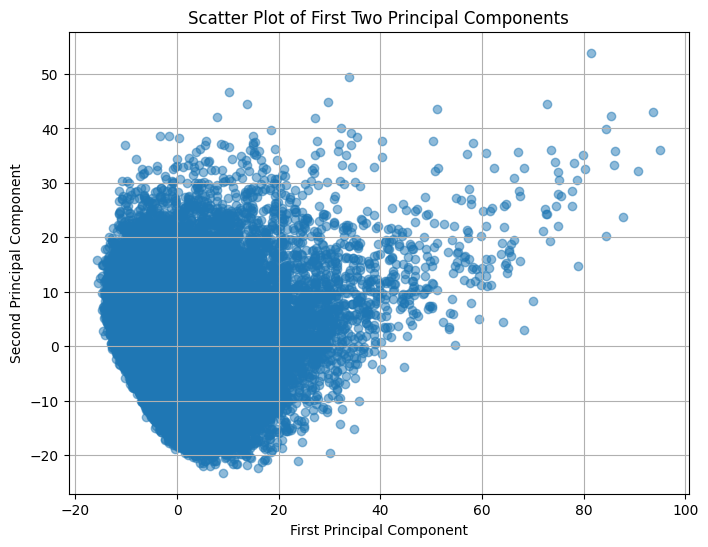

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Scatter Plot of First Two Principal Components')
plt.grid(True)

# Save the scatter plot as an image file
plt.savefig('pca_scatter_plot.png')

# Show the plot
plt.show()


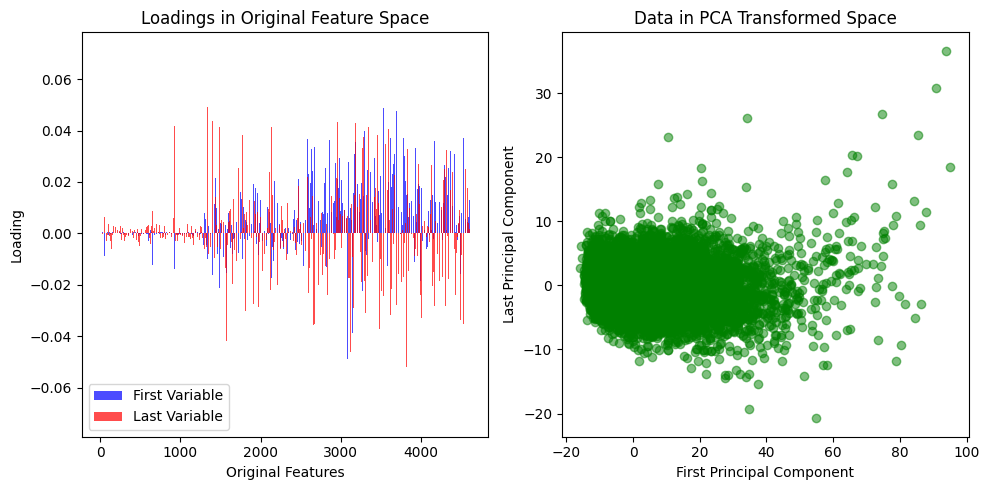

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'pca' is your PCA model
# Assuming 'X_scaled' is your standardized feature matrix before PCA

# Fit PCA
pca.fit(X_scaled)

# Get the loadings of the first and last variables
first_variable_loading = pca.components_[0]
last_variable_loading = pca.components_[-1]

# Original feature space plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(range(len(first_variable_loading)), first_variable_loading, color='blue', alpha=0.7, label='First Variable')
plt.bar(range(len(last_variable_loading)), last_variable_loading, color='red', alpha=0.7, label='Last Variable')
plt.xlabel('Original Features')
plt.ylabel('Loading')
plt.title('Loadings in Original Feature Space')
plt.legend()

# Transformed PCA space plot
plt.subplot(1, 2, 2)
plt.scatter(pca.transform(X_scaled)[:, 0], pca.transform(X_scaled)[:, -1], color='green', alpha=0.5)
plt.xlabel('First Principal Component')
plt.ylabel('Last Principal Component')
plt.title('Data in PCA Transformed Space')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [ ]:
# Load the dataset
data = pd.read_csv('pca_label.csv')

# Separate features (PCA components) and labels
X = data.drop(columns=['label'])
y = data['label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# Initialize classifiers
classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    KNeighborsClassifier(),
    GaussianNB(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    LogisticRegression(),
]

In [ ]:
# # Train and evaluate each classifier
# for clf in classifiers:
#     clf.fit(X_train, y_train)
#     y_pred = clf.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     print(f"{clf.__class__.__name__} Accuracy: {accuracy:.2f}")

In [ ]:
# Check for missing values in the target variable

# Handle missing values in the target variable
y_train_imputed = y_train.fillna(y_train.mode()[0])  # Impute missing values with the mode

# Train and evaluate each classifier
for clf in classifiers:
    clf.fit(X_train_imputed, y_train_imputed)
    y_pred = clf.predict(X_test_imputed)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    class_report = classification_report(y_test, y_pred)

    # Print evaluation metrics
    print(f"{clf.__class__.__name__} Metrics:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")
    print("Classification Report:\n", class_report)


DecisionTreeClassifier Metrics:
Accuracy: 0.32
Precision: 0.32
Recall: 0.32
F1-score: 0.32
Classification Report:
               precision    recall  f1-score   support

         0.0       0.34      0.35      0.35       440
         1.0       0.37      0.35      0.36       458
         2.0       0.21      0.20      0.21       436
         3.0       0.19      0.17      0.18       479
         4.0       0.29      0.29      0.29       476
         5.0       0.31      0.30      0.31       435
         6.0       0.40      0.47      0.43       422
         7.0       0.34      0.31      0.32       478
         8.0       0.37      0.40      0.38       465
         9.0       0.39      0.39      0.39       449

    accuracy                           0.32      4538
   macro avg       0.32      0.32      0.32      4538
weighted avg       0.32      0.32      0.32      4538

RandomForestClassifier Metrics:
Accuracy: 0.52
Precision: 0.52
Recall: 0.52
F1-score: 0.52
Classification Report:
            

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.impute import SimpleImputer

# Impute missing values in X_train
imputer = SimpleImputer(strategy='most_frequent')
X_train_imputed = imputer.fit_transform(X_train)

# Impute missing values in X_test
X_test_imputed = imputer.transform(X_test)

# Train and evaluate each classifier
for clf in classifiers:
    clf.fit(X_train_imputed, y_train_imputed)  # Use imputed X_train
    y_pred = clf.predict(X_test_imputed)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{clf.__class__.__name__} Accuracy: {accuracy:.2f}")


DecisionTreeClassifier Accuracy: 0.32
RandomForestClassifier Accuracy: 0.52
SVC Accuracy: 0.59
KNeighborsClassifier Accuracy: 0.47
GaussianNB Accuracy: 0.37
GradientBoostingClassifier Accuracy: 0.54
AdaBoostClassifier Accuracy: 0.43
LogisticRegression Accuracy: 0.57


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#So model selected for best accuracy is SVC .